In [111]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew
import warnings
warnings.filterwarnings("ignore")

In [4]:
raw_data = pd.read_csv('F:\\Muthu_2023\\Personal\\NextStep\\PdM\\Predictive-Maintenance\\Datasets\\train_FD001.csv')

In [66]:
raw_data.describe(include='all').T

,count,mean,std,min,25%,50%,75%,max
Engine,20631.0,51.506568,2.922763e+01,1.0000,26.0000,52.0000,77.0000,100.0000
Cycles,20631.0,108.807862,6.888099e+01,1.0000,52.0000,104.0000,156.0000,362.0000
Sensor1,20631.0,-0.000009,2.187313e-03,-0.0087,-0.0015,0.0000,0.0015,0.0087
Sensor2,20631.0,0.000002,2.930621e-04,-0.0006,-0.0002,0.0000,0.0003,0.0006
Sensor3,20631.0,100.000000,0.000000e+00,100.0000,100.0000,100.0000,100.0000,100.0000
Sensor4,20631.0,518.670000,6.537152e-11,518.6700,518.6700,518.6700,518.6700,518.6700
Sensor5,20631.0,642.680934,5.000533e-01,641.2100,642.3250,642.6400,643.0000,644.5300
Sensor6,20631.0,1590.523119,6.131150e+00,1571.0400,1586.2600,1590.1000,1594.3800,1616.9100
Sensor7,20631.0,1408.933782,9.000605e+00,1382.2500,1402.3600,1408.0400,1414.5550,1441.4900
Sensor8,20631.0,14.620000,3.394700e-12,14.6200,14.6200,14.6200,14.6200,14.6200


# Sensor Data
Constant: 3, 4, 8, 9, 13, 19, 21, 22
Discrete: 2, 20

In [7]:
df = raw_data.drop(['Sensor3', 'Sensor4', 'Sensor8','Sensor9', 'Sensor13', 'Sensor19', 'Sensor21', 'Sensor22'], axis=1)

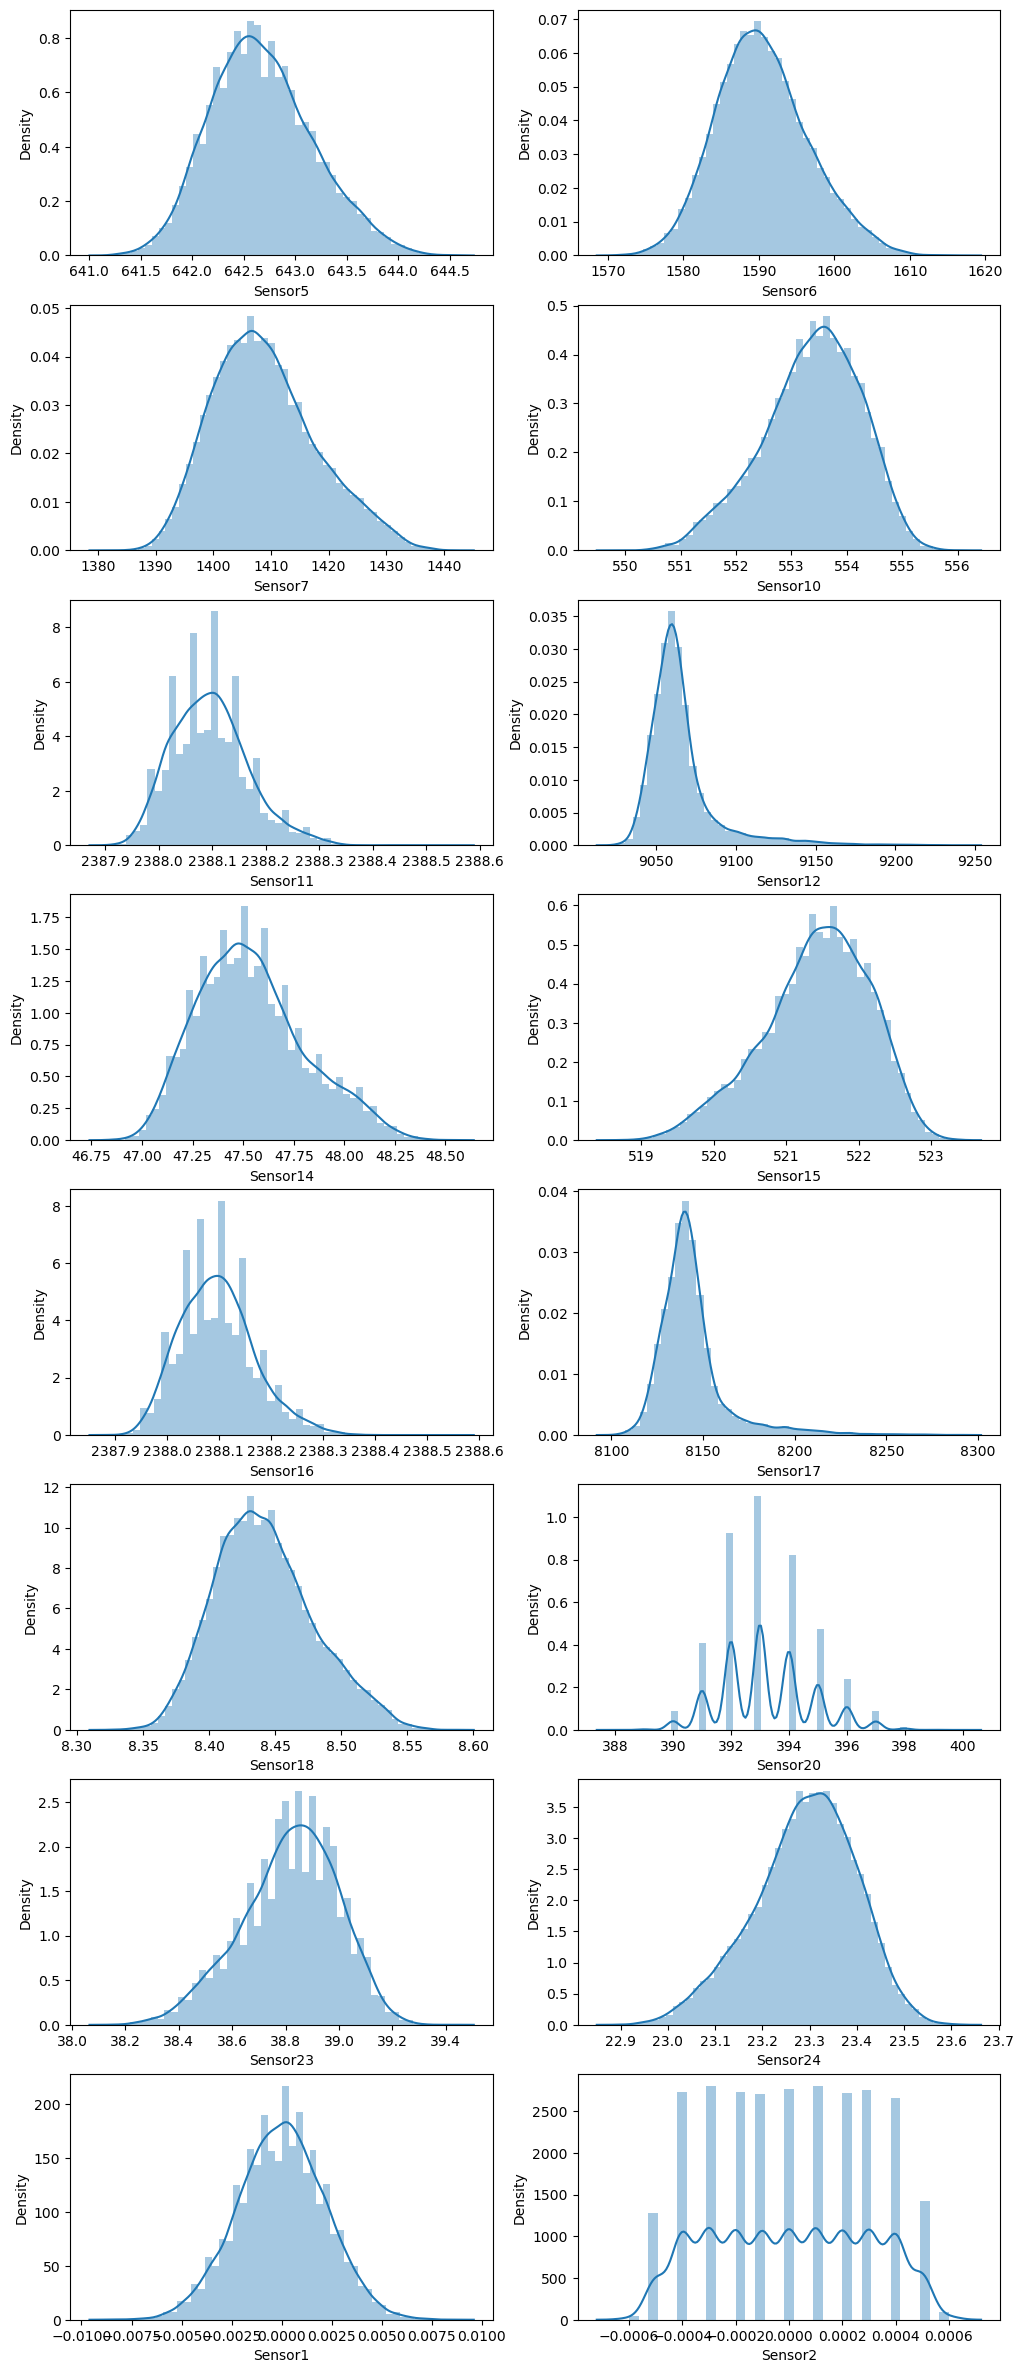

In [110]:
#Frequency Distribution
col_list = list(df.columns)
fig, ax = plt.subplots(8, 2, figsize=(12,30))
for i in range(2, len(col_list)-1, 2):
    mean=df[col_list[i]].mean()
    median=df[col_list[i]].median()
    mode=df[col_list[i]].mode().values[0]

    sns.distplot(df[col_list[i]], kde=True, ax = ax[(i//2 - 2),0])
    if i+1 < len(col_list)-1:
        mean=df[col_list[i+1]].mean()
        median=df[col_list[i+1]].median()
        mode=df[col_list[i+1]].mode().values[0]
        sns.distplot(df[col_list[i+1]], kde=True, ax = ax[(i//2 - 2),1])

In [114]:
#Skewness
df.iloc[:, 2:-1].skew(axis=0)

Sensor1    -0.024766
Sensor2     0.009085
Sensor5     0.316526
Sensor6     0.308946
Sensor7     0.443194
Sensor10   -0.394329
Sensor11    0.479411
Sensor12    2.555365
Sensor14    0.469329
Sensor15   -0.442407
Sensor16    0.469792
Sensor17    2.372554
Sensor18    0.388259
Sensor20    0.353126
Sensor23   -0.358445
Sensor24   -0.350375
dtype: float64

In [115]:
# df_grp = df.groupby('Engine').mean()
# df_grp.reset_index(inplace=True)
# cols = list(df_grp.columns)
# for i in range(2,len(cols)):
#     plt.figure(figsize=(12,6))
#     plt.scatter(df_grp['Engine'], df_grp.iloc[:,i])
#     plt.title(cols[i])

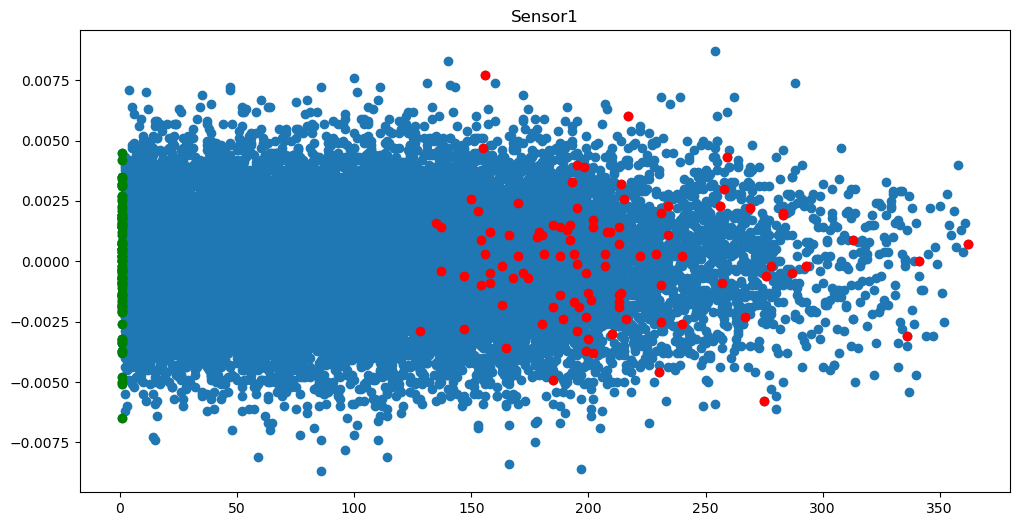

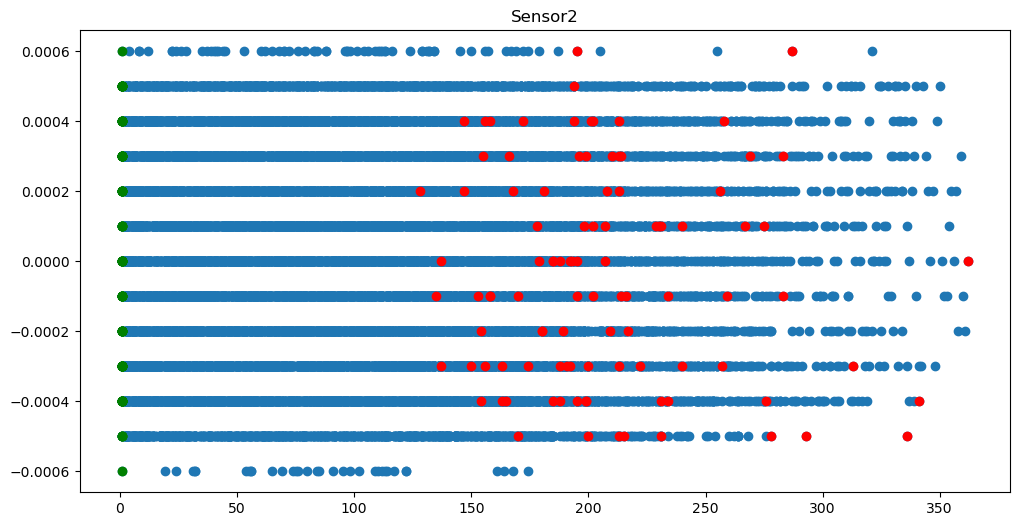

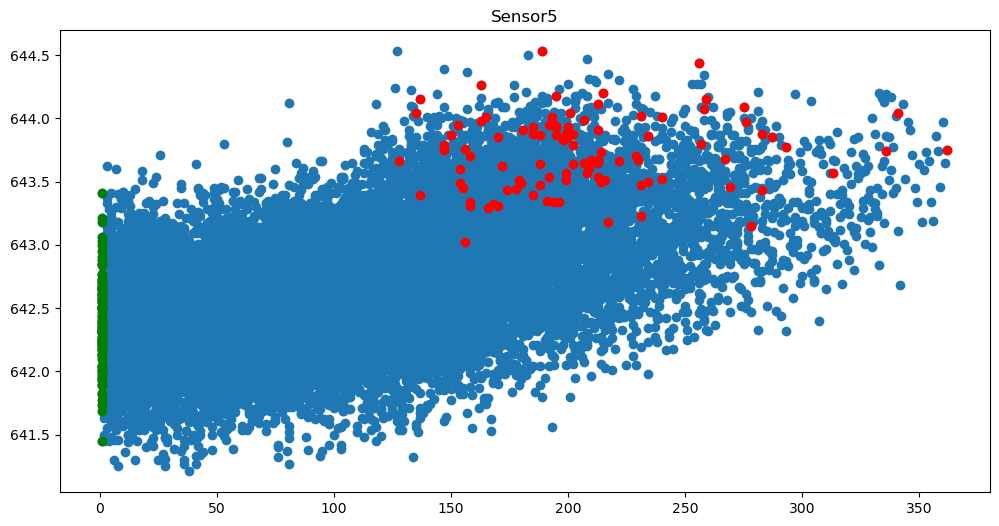

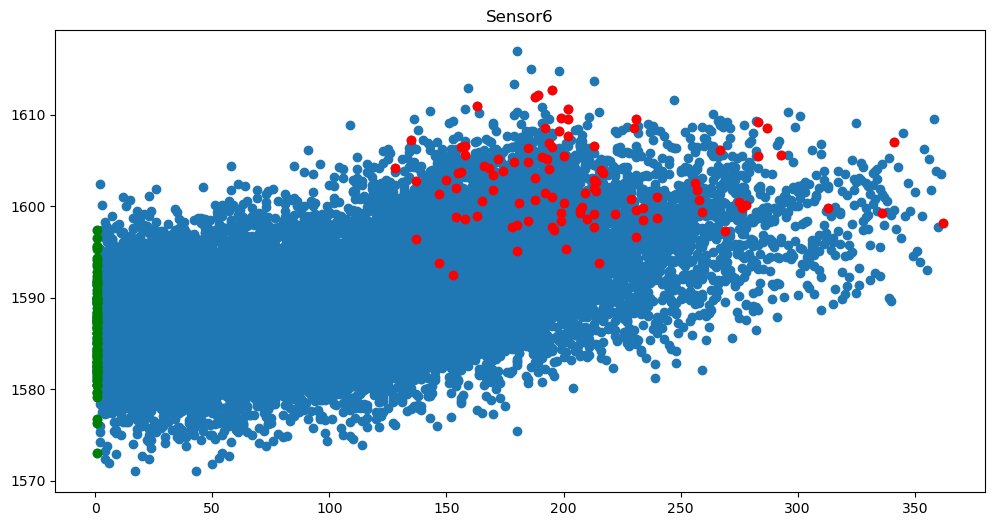

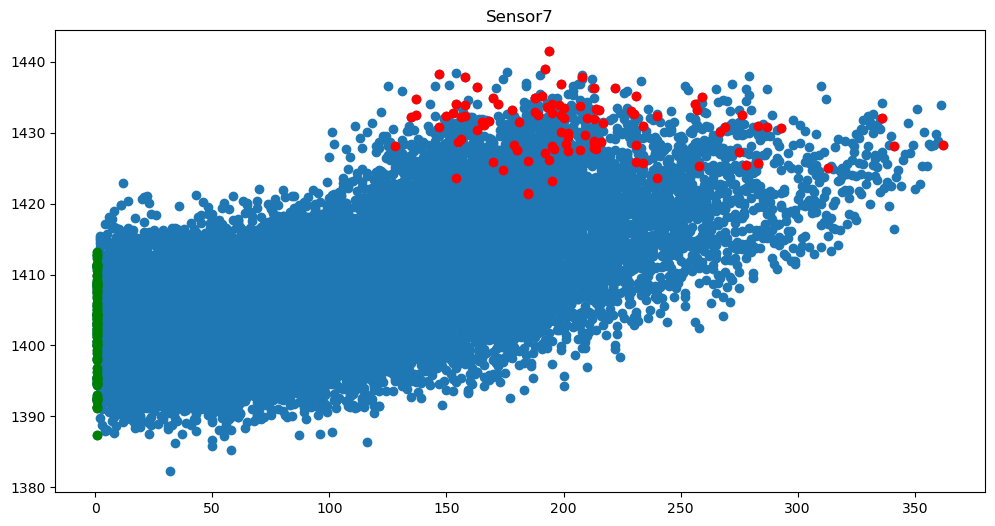

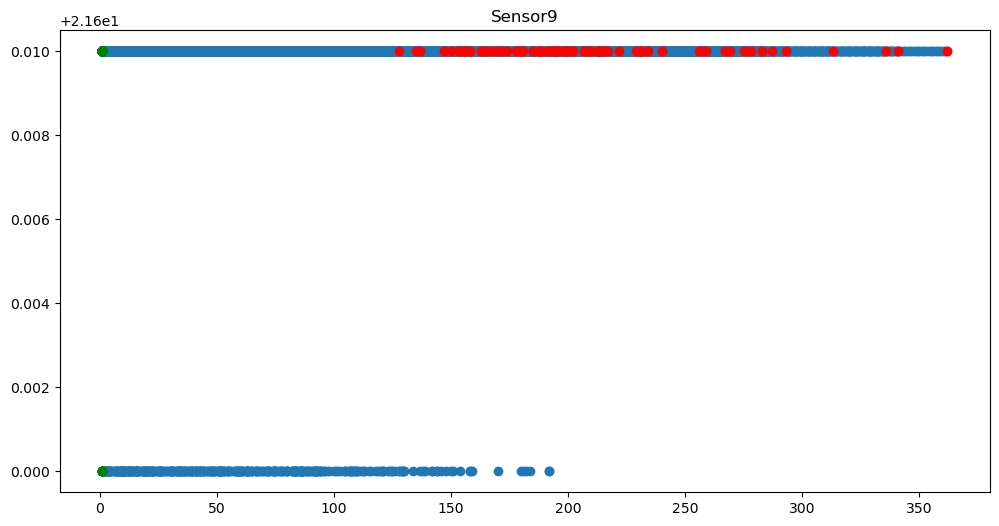

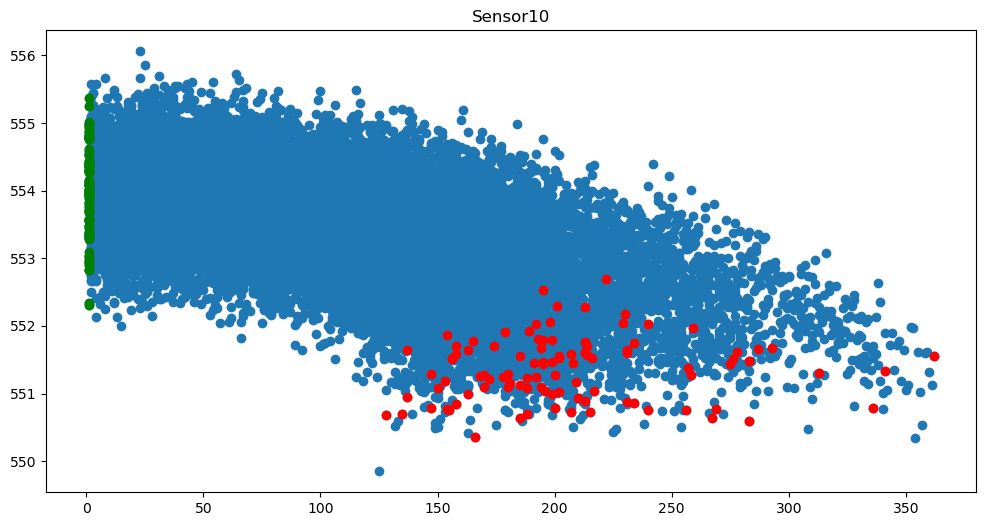

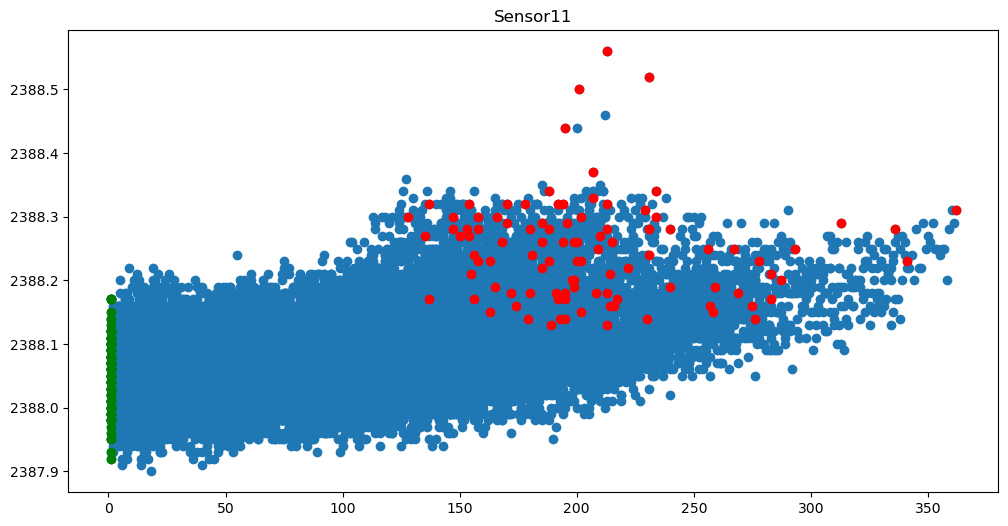

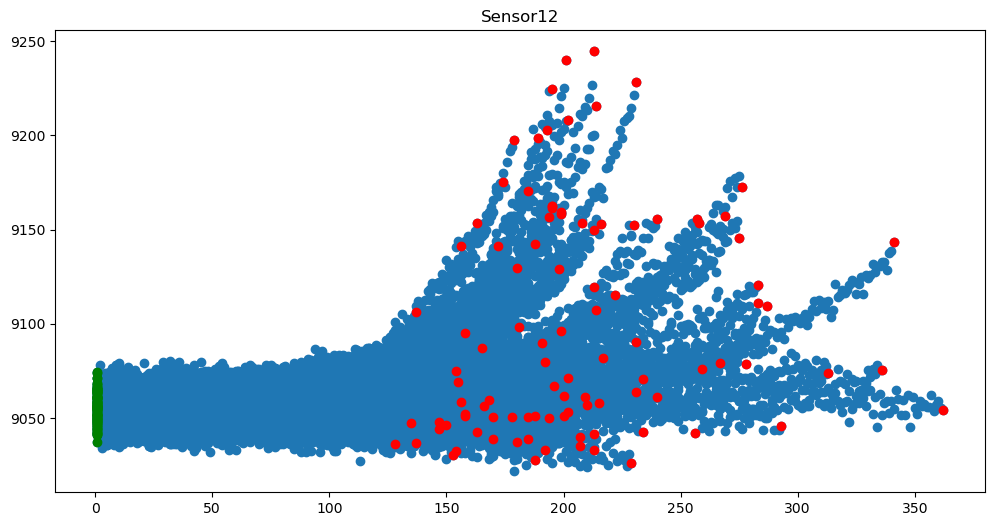

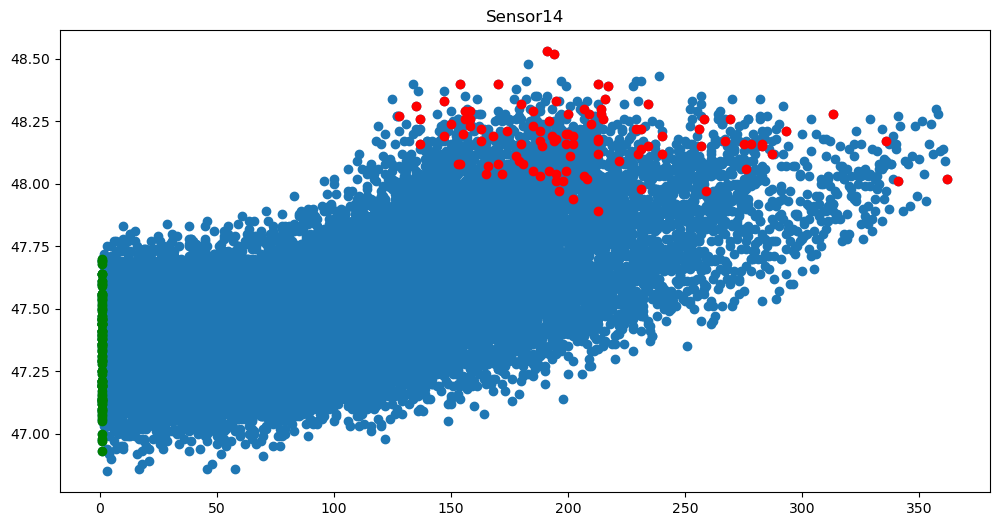

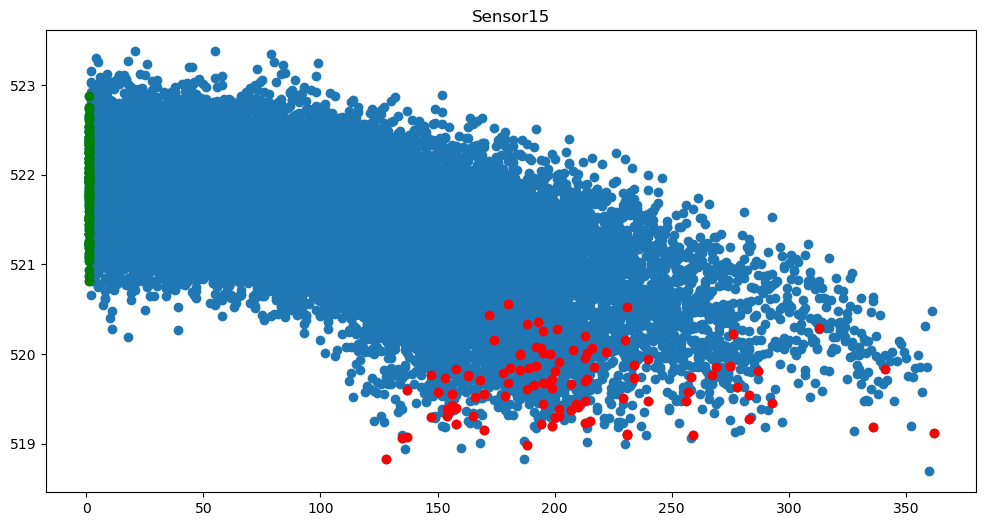

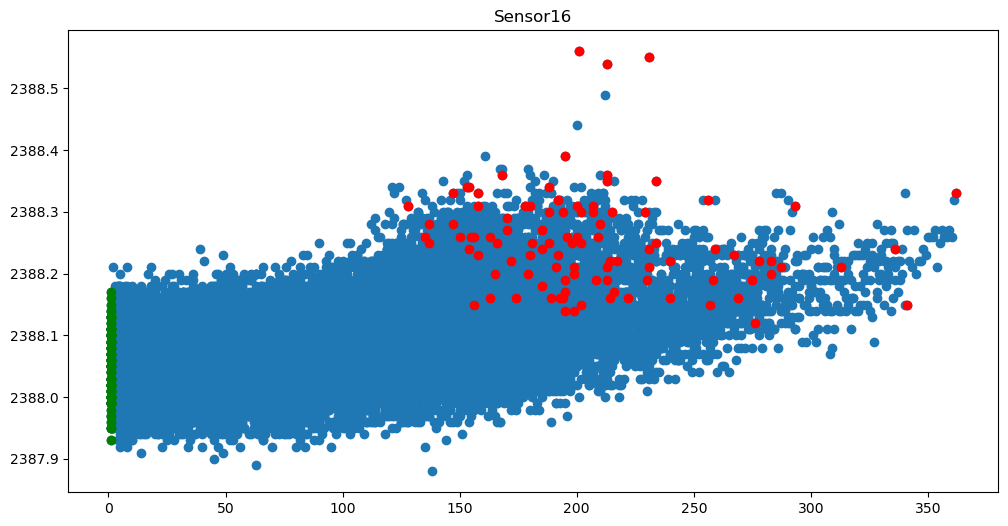

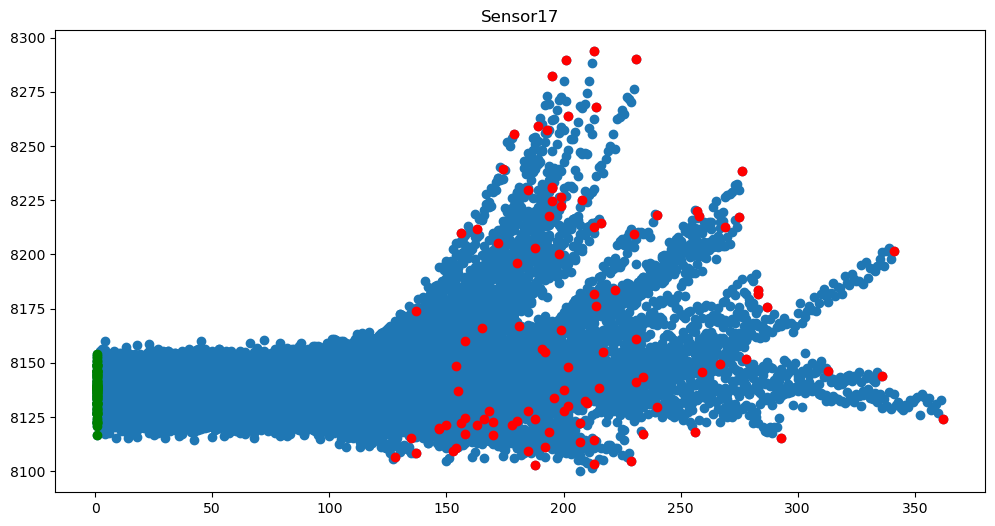

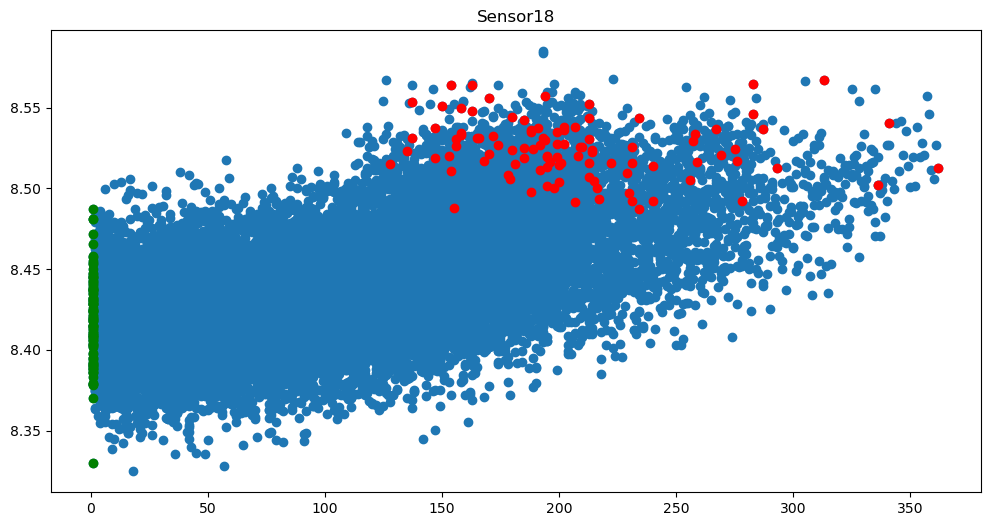

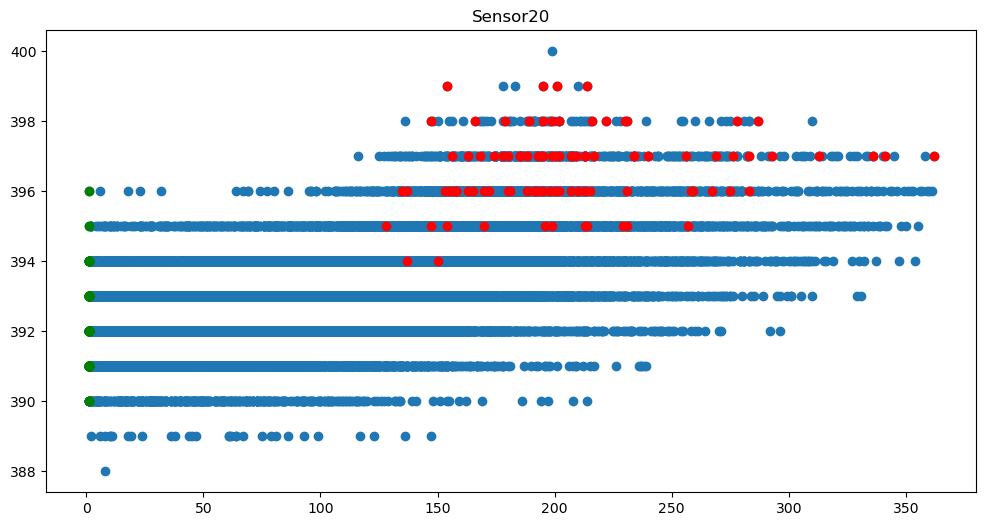

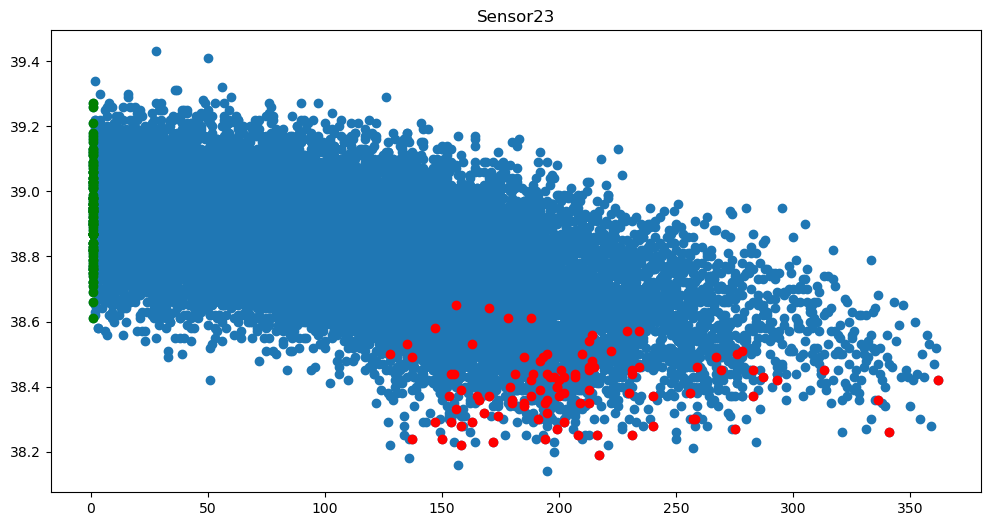

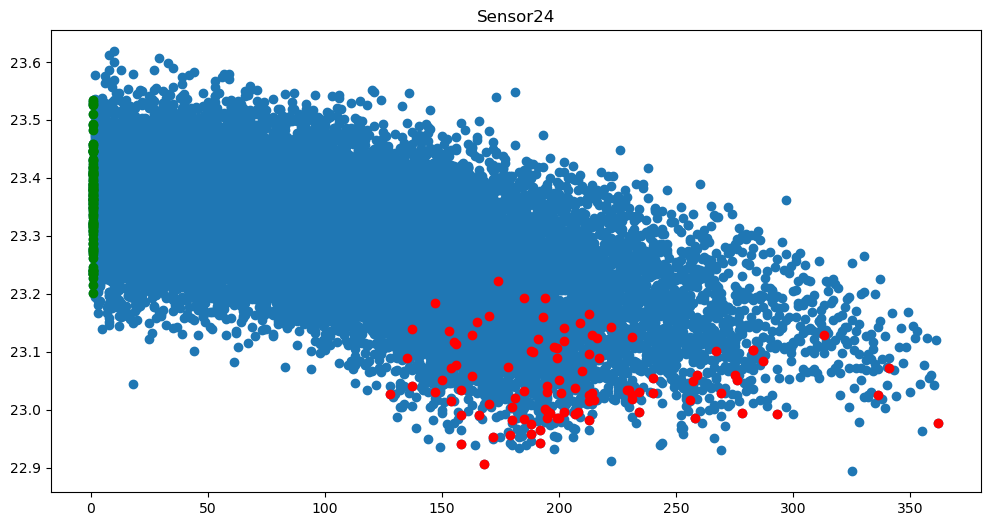

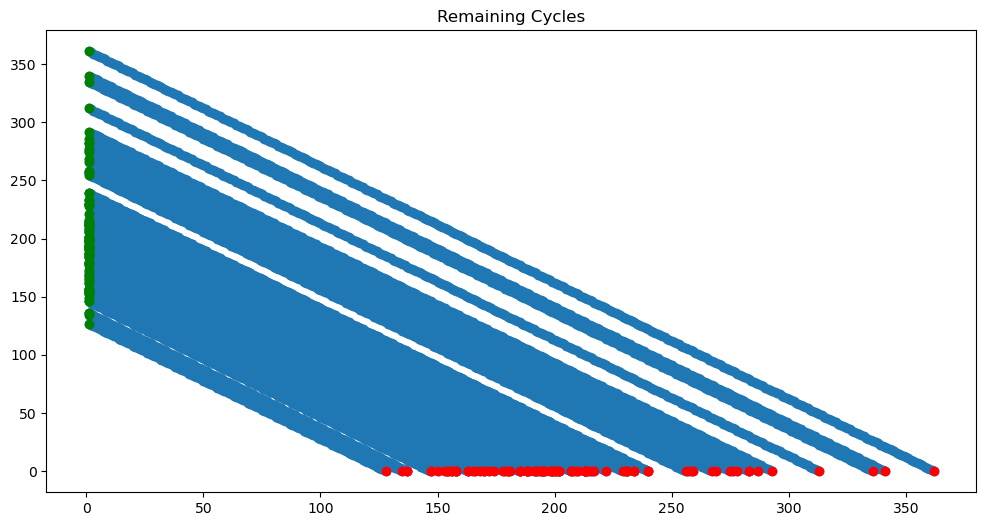

In [12]:
max_pt = list(df[['Engine', 'Cycles']].groupby('Engine').idxmax()['Cycles'])
min_pt = list(df[['Engine', 'Cycles']].groupby('Engine').idxmin()['Cycles'])

max_df = df.loc[max_pt]
min_df = df.loc[min_pt]
cols = list(df.columns)
for i in range(2,len(cols)-1):
    plt.figure(figsize=(12,6))
    plt.scatter(df['Cycles'], df.iloc[:,i])
    plt.scatter(max_df['Cycles'], max_df.iloc[:,i], color='r')
    plt.scatter(min_df['Cycles'], min_df.iloc[:,i], color='g')
    plt.title(cols[i])